     student_id prompt_id            text
0  000000ffffff    abc123  Example text 1
1  111111eeeeee    def789  Example text 2
2  222222cccccc    abc123  Example text 3
3  333333dddddd    def789  Example text 4
     student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0020ae56ffbf    ebad26  They would rub it up with soda to make the sme...   
2  004e978e639e    3b9047  In Egypt, there were many occupations and soci...   
3  005ab0199905    3b9047  The highest class was Pharaohs these people we...   
4  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   

    content   wording  
0  0.205683  0.380538  
1 -0.548304  0.506755  
2  3.128928  4.231226  
3 -0.210614 -0.471415  
4  3.272894  3.219757  
  prompt_id prompt_question     prompt_title       prompt_text
0    abc123    Summarize...  Example Title 1  Heading\nText...
1    def789    Summarize...  Example Ti

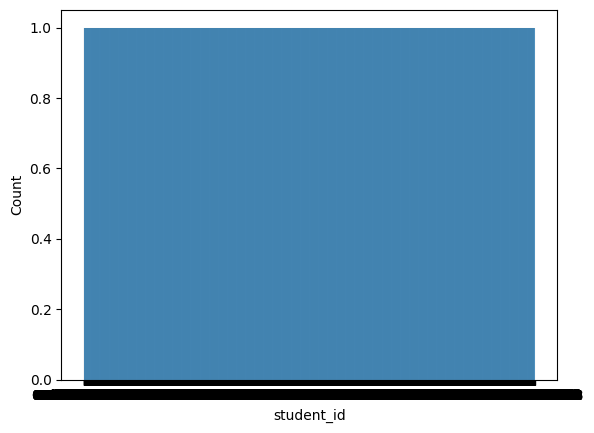

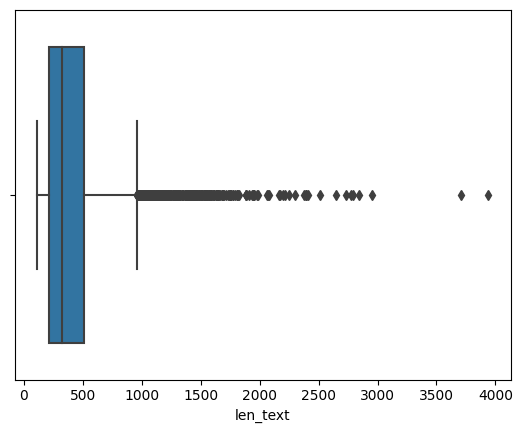

Valores únicos en 'prompt_id': 4


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos los datos de los cuatro archivos csv
df_summaries_test = pd.read_csv('data/summaries_test.csv')
df_summaries_train = pd.read_csv('data/summaries_train.csv')
df_prompts_test = pd.read_csv('data/prompts_test.csv')
df_prompts_train = pd.read_csv('data/prompts_train.csv')

# Verificamos que se hayan cargado bien, mostrando las primeras filas de cada uno
print(df_summaries_test.head())
print(df_summaries_train.head())
print(df_prompts_test.head())
print(df_prompts_train.head())

# Generamos estadísticas descriptivas para las columnas numéricas de df_summaries_test
print(df_summaries_train.describe())

# Como ejemplo, suponemos que la variable 'text' es de formato string y deseamos conocer la cantidad de caracteres en ella,
# generamos una nueva columna en el dataframe con dicha información
df_summaries_train['len_text'] = df_summaries_train['text'].str.len()

# Generamos un gráfico para visualizar la distribución de las longitudes de 'text'
sns.boxplot(x=df_summaries_train['len_text'])
plt.show()

# Listamos la cantidad de valores distintos en la columna 'prompt_id'
print("Valores únicos en 'prompt_id':", df_summaries_train['prompt_id'].nunique())
